In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import xgboost as xgb
from scipy import stats
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape


(10000, 14)

In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [ ]:
df.tail()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#label encoding for the geography
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,1,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#label encoding for the gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,0,28,4,130142.79,1,1,0,38190.78,0


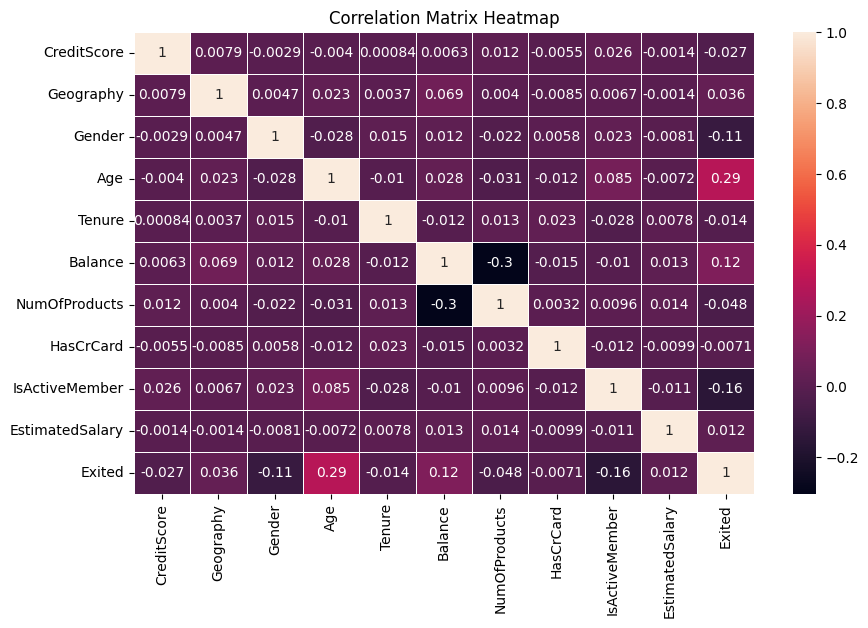

In [ ]:
correlation_matrix = df.corr()
correlation_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
y=df['Exited']
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
X=df
X=X.drop(['Exited'],axis=1)
X.head()




,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
#seeing the correclation , hence removing the HasCrCard Feature
#X=X.drop(['HasCrCard'],axis=1,inplace=True)

In [ ]:
# Mm=MinMaxScaler()
# X_scaled=Mm.fit_transform(X[['Balance','EstimatedSalary']])
# X_scaled1=pd.DataFrame(X_scaled,columns=['Balance','EstimatedSalary'])
# X_scaled=pd.concat([X_scaled1,X.drop(['Balance','EstimatedSalary'],axis=1)],axis=1)
# X_scaled.head()

CreditScore
-0.07160660820092675
Geography
0.5009158414285837
Gender
-0.1835959100396862
Age
1.0113202630234552
Tenure
0.01099145797717904
Balance
-0.14110871094154384
NumOfProducts
0.7455678882823168
HasCrCard
-0.9018115952400578
IsActiveMember
-0.06043662833499078
EstimatedSalary
0.0020853576615585162


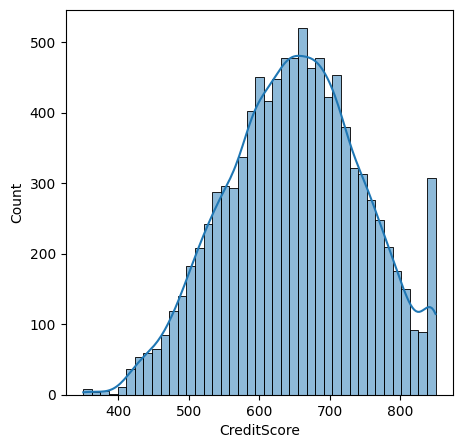

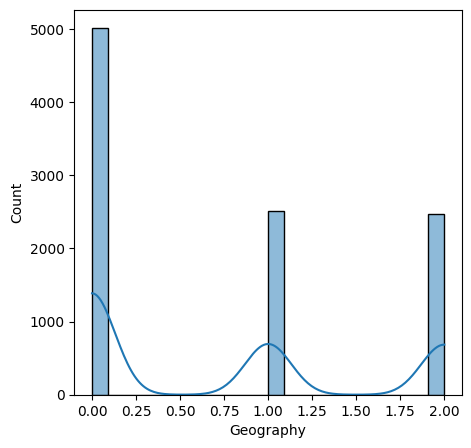

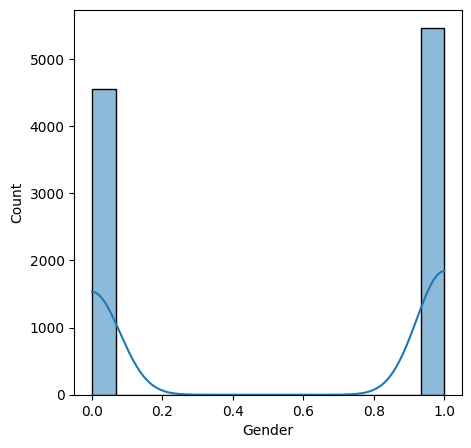

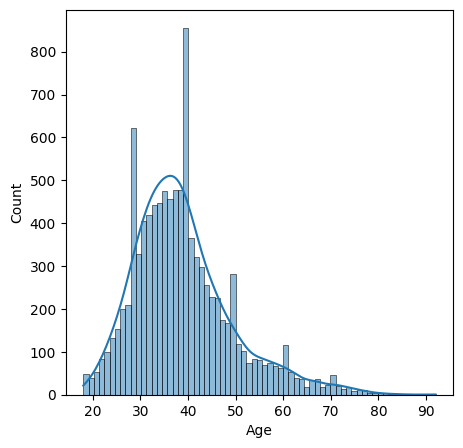

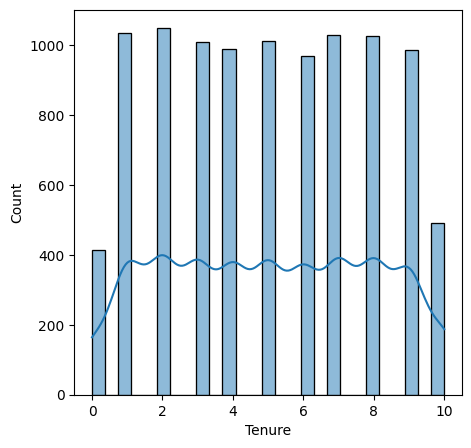

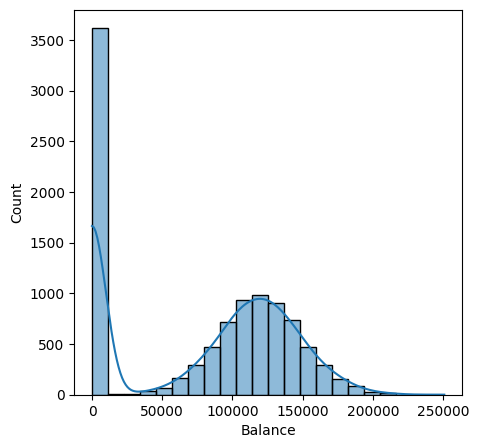

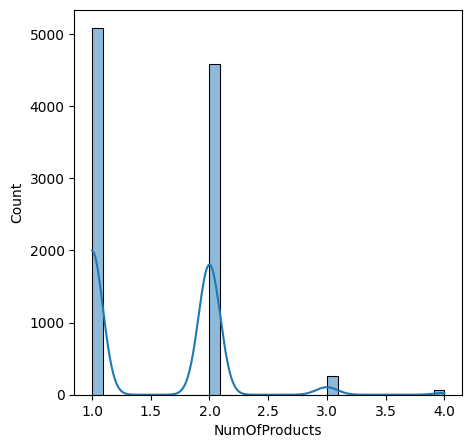

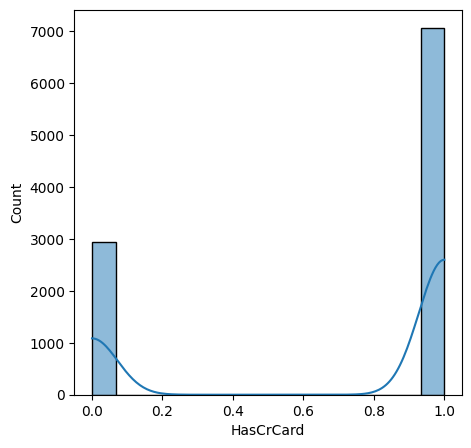

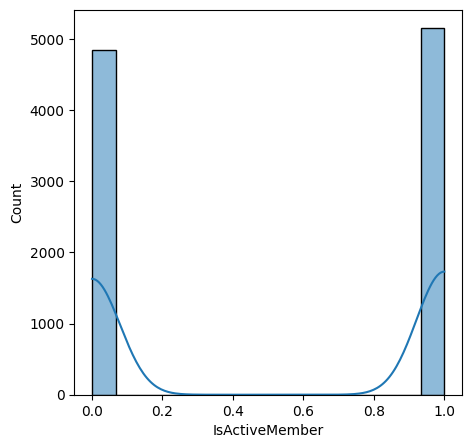

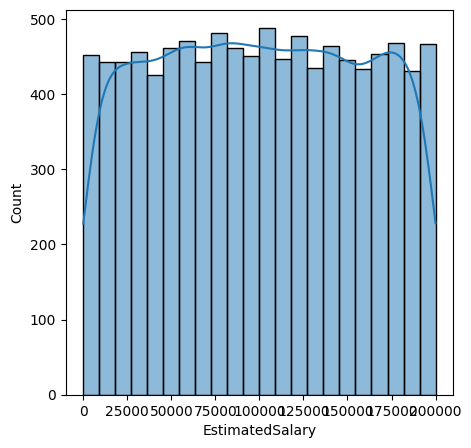

In [ ]:
for col in X.columns:

    print(col)
    print(X[col].skew())
    plt.figure(figsize=(5, 5))
    sns.histplot(X[col], kde=True)

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
X[['Geography','NumOfProducts']] = pt.fit_transform(X[['Geography','NumOfProducts']])
X['Age'] = np.log(X['Age'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,-0.968696,0,3.737670,2,0.00,-0.968357,1,1,101348.88
1,608,1.312507,0,3.713572,1,83807.86,-0.968357,0,1,112542.58
2,502,-0.968696,0,3.737670,8,159660.80,1.820493,1,0,113931.57
3,699,-0.968696,0,3.663562,1,0.00,0.936715,0,0,93826.63
4,850,1.312507,0,3.761200,2,125510.82,-0.968357,1,1,79084.10


In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
13555,756,-0.186232,0,3.868595,5,109398.022892,0.388062,0,0,184011.804544
1665,749,-0.968696,1,3.737670,1,129776.720000,0.936715,0,1,143538.510000
14878,595,0.309329,1,3.575546,2,146014.742913,-0.130585,1,0,56085.107848
7471,658,0.640080,0,4.007333,8,119327.930000,-0.968357,0,1,119439.660000
2582,656,-0.968696,0,3.828641,5,113402.140000,0.936715,1,1,138849.060000


In [ ]:
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# y_train_res.value_counts()

In [ ]:
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)
# model
model=xgb.XGBClassifier(max_depth=5,n_estimators=300,use_label_encoder=False,learning_rate=0.2,reg_lambda=2,random_state=42)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
score=model.score(X_test,y_test)
score

0.9121155053358443

Confusion matrix
[[1513  120]
 [ 160 1393]]


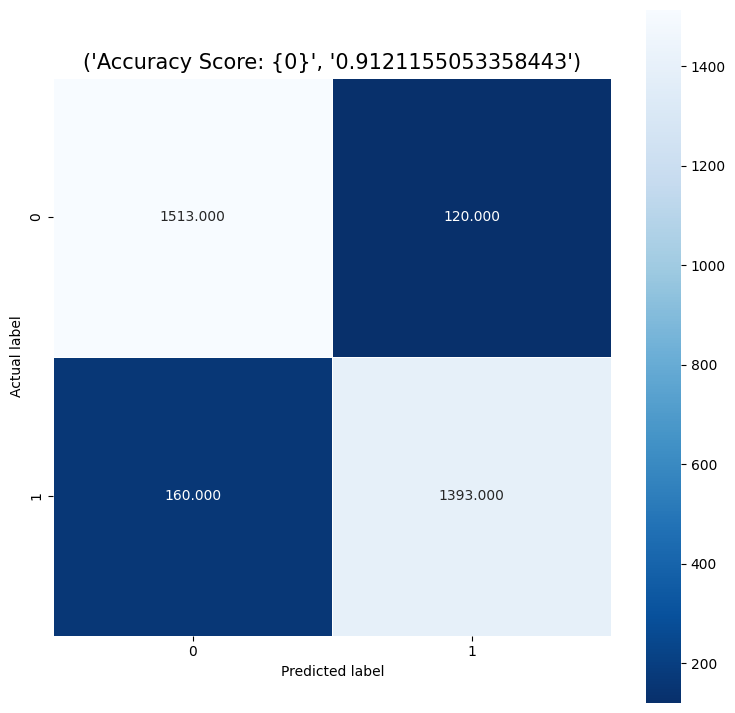

In [ ]:
confusion =confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print (confusion)

# plot_confusion_matrix(confusion);
plt.show();
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths =.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}',format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9121155053358443


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[1513  120]
 [ 160 1393]]


In [ ]:
y_pred1 =model.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train, y_pred1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9624803767660911
